<a href="https://colab.research.google.com/github/Phantasm320/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')
df.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [0]:
df1 = df[df['TREE'] == 1]
df2 = df[df['TREES'] == 1]
df3 = df[df['DECIDUOUS'] == 1]
df4 = df[df['CONIFER'] == 1]
df5 = df[df['CLOUDS'] == 1]
df6 = df[df['MOUNTAIN'] == 1]
df7 = df[df['GRASS'] == 1]
df8 = df[df['LAKE'] == 1]
df9 = df[df['RIVER'] == 1]
df10 = df[df['BUSHES'] == 1]
df11 = df[df['SNOWY_MOUNTAIN'] == 1]
df12 = df[df['MOUNTAINS'] == 1]
df13 = df[df['STRUCTURE'] == 1]
df14 = df[df['CUMULUS'] == 1]
df15 = df[df['ROCKS'] == 1]
df16 = df[df['SUN'] == 1]
df17 = df[df['WATERFALL'] == 1]
df18 = df[df['SNOW'] == 1]
df19 = df[df['CABIN'] == 1]
df20 = df[df['WINTER'] == 1]
df21 = df[df['FRAMED'] == 1]
df22 = df[df['PATH'] == 1]
df23 = df[df['OVAL_FRAME'] == 1]
df24 = df[df['OCEAN'] == 1]
df25 = df[df['WAVES'] == 1]
df26 = df[df['BEACH'] == 1]
df27 = df[df['CIRRUS'] == 1]

<Container object of 1 artists>

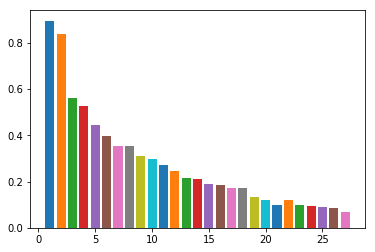

In [98]:
plt.bar(x = 1, height = df1.shape[0]/df.shape[0])
plt.bar(x = 2, height = df2.shape[0]/df.shape[0])
plt.bar(x = 3, height = df3.shape[0]/df.shape[0])
plt.bar(x = 4, height = df4.shape[0]/df.shape[0])
plt.bar(x = 5, height = df5.shape[0]/df.shape[0])
plt.bar(x = 6, height = df6.shape[0]/df.shape[0])
plt.bar(x = 7, height = df7.shape[0]/df.shape[0])
plt.bar(x = 8, height = df8.shape[0]/df.shape[0])
plt.bar(x = 9, height = df9.shape[0]/df.shape[0])
plt.bar(x = 10, height = df10.shape[0]/df.shape[0])
plt.bar(x = 11, height = df11.shape[0]/df.shape[0])
plt.bar(x = 12, height = df12.shape[0]/df.shape[0])
plt.bar(x = 13, height = df13.shape[0]/df.shape[0])
plt.bar(x = 14, height = df14.shape[0]/df.shape[0])
plt.bar(x = 15, height = df15.shape[0]/df.shape[0])
plt.bar(x = 16, height = df16.shape[0]/df.shape[0])
plt.bar(x = 17, height = df17.shape[0]/df.shape[0])
plt.bar(x = 18, height = df18.shape[0]/df.shape[0])
plt.bar(x = 19, height = df19.shape[0]/df.shape[0])
plt.bar(x = 20, height = df20.shape[0]/df.shape[0])
plt.bar(x = 21, height = df21.shape[0]/df.shape[0])
plt.bar(x = 22, height = df22.shape[0]/df.shape[0])
plt.bar(x = 23, height = df23.shape[0]/df.shape[0])
plt.bar(x = 24, height = df24.shape[0]/df.shape[0])
plt.bar(x = 25, height = df25.shape[0]/df.shape[0])
plt.bar(x = 26, height = df26.shape[0]/df.shape[0])
plt.bar(x = 27, height = df27.shape[0]/df.shape[0])

In [85]:
df.sum(axis = 1)

0       6
1       9
2      10
3       8
4       5
5      13
6       7
7       7
8       4
9       7
10      4
11      9
12      8
13     10
14      6
15      8
16     14
17      6
18      8
19      9
20      9
21      9
22      5
23     11
24      9
25     10
26     10
27      9
28      6
29      7
       ..
373     2
374    11
375     9
376     8
377     6
378     8
379     7
380     5
381     5
382     8
383     8
384     9
385    12
386     5
387     8
388     8
389     8
390     6
391     8
392     7
393     6
394     9
395     8
396     7
397     5
398     8
399     7
400    12
401    10
402     5
Length: 403, dtype: int64

In [0]:
del df['EPISODE']
del df['TITLE']

In [88]:
df.head()

,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [0]:
new = df.sum()

In [95]:
new.sort_values()

LAKES                   0
FARM                    1
FIRE                    1
FLORIDA_FRAME           1
HALF_CIRCLE_FRAME       1
HALF_OVAL_FRAME         1
LIGHTHOUSE              1
PERSON                  1
RECTANGLE_3D_FRAME      1
RECTANGULAR_FRAME       1
SEASHELL_FRAME          1
SPLIT_FRAME             1
TOMB_FRAME              1
TRIPLE_FRAME            1
WINDMILL                1
WINDOW_FRAME            1
DOUBLE_OVAL_FRAME       1
DOCK                    1
APPLE_FRAME             1
WOOD_FRAMED             1
BUILDING                1
DIANE_ANDRE             1
AURORA_BOREALIS         2
BOAT                    2
MILL                    2
CIRCLE_FRAME            2
PORTRAIT                3
MOON                    3
CACTUS                  4
BRIDGE                  7
                     ... 
GUEST                  22
FOG                    23
FENCE                  24
BEACH                  27
CIRRUS                 28
WAVES                  34
OCEAN                  36
OVAL_FRAME  

In [0]:
df1 = df[df['TREE'] == 1]
df2 = df[df['TREES'] == 1]
df3 = df[df['DECIDUOUS'] == 1]
df4 = df[df['CONIFER'] == 1]
df5 = df[df['CLOUDS'] == 1]
df6 = df[df['MOUNTAIN'] == 1]
df7 = df[df['LAKE'] == 1]
df8 = df[df['GRASS'] == 1]
df9 = df[df['RIVER'] == 1]
df10 = df[df['BUSHES'] == 1]
df11 = df[df['SNOWY_MOUNTAIN'] == 1]
df12 = df[df['MOUNTAINS'] == 1]
df13 = df[df['CUMULUS'] == 1]
df14 = df[df['STRUCTURE'] == 1]
df15 = df[df['ROCKS'] == 1]
df16 = df[df['SNOW'] == 1]
df17 = df[df['CABIN'] == 1]
df18 = df[df['WINTER'] == 1]
df19 = df[df['FRAMED'] == 1]
df20 = df[df['PATH'] == 1]
df21 = df[df['SUN'] == 1]
df22 = df[df['PATH'] == 1]
df23 = df[df['WATERFALL'] == 1]
df24 = df[df['OVAL_FRAME'] == 1]
df25 = df[df['OCEAN'] == 1]
df26 = df[df['WAVES'] == 1]
df27 = df[df['CIRRUS'] == 1]

In [110]:
new.index
len(new.values)

67

<Container object of 67 artists>

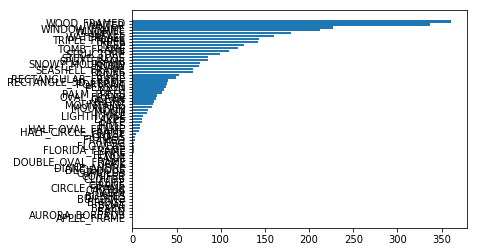

In [109]:
plt.barh(new.index, new.sort_values())

In [113]:
new.values[0:38]

array([  1,   2,  17,  27,   2,   7,   1, 120,  69,   4,   2,  28,   8,
       179, 212,  86, 227,   1,   1,   1,   1,  24,   1,   1,  12,  23,
        53, 142,  22,   1,   1,  18, 143,   0,   1,   2,   3, 160])

In [0]:
dfs = new.sort_values(ascending = False)

In [0]:
final = dfs[0:38]

<Container object of 38 artists>

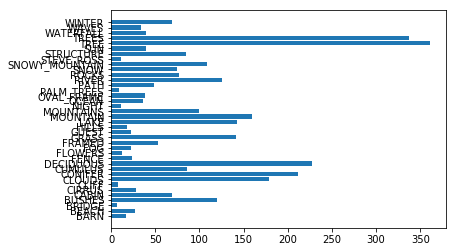

In [125]:
plt.barh(final.index, final.values)

In [128]:
final.index

Index(['TREE', 'TREES', 'DECIDUOUS', 'CONIFER', 'CLOUDS', 'MOUNTAIN', 'LAKE',
       'GRASS', 'RIVER', 'BUSHES', 'SNOWY_MOUNTAIN', 'MOUNTAINS', 'CUMULUS',
       'STRUCTURE', 'ROCKS', 'SNOW', 'CABIN', 'WINTER', 'FRAMED', 'PATH',
       'SUN', 'WATERFALL', 'OVAL_FRAME', 'OCEAN', 'WAVES', 'CIRRUS', 'BEACH',
       'FENCE', 'FOG', 'GUEST', 'HILLS', 'BARN', 'FLOWERS', 'NIGHT',
       'STEVE_ROSS', 'PALM_TREES', 'CLIFF', 'BRIDGE'],
      dtype='object')

In [0]:
finals = final.sort_values(ascending = True)

<Container object of 38 artists>

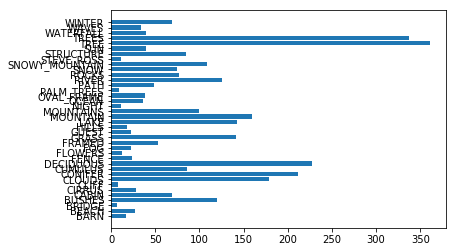

In [136]:
plt.barh(finals.index, finals.values)